In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.manifold import TSNE
import pickle as pk
# data read
author_emd = {}
dataset_emd = {}
method_emd = {}
fAuthor = open(
    "../../data/HetGNNdata/0423author_node_embedding.txt", "r")

print('start')

for line in tqdm(fAuthor):
    line = line.strip().split(' ')
    temp_ebd = list(map(float, line[1:]))
    author_emd[line[0]] = np.array(temp_ebd)
fAuthor.close()

fDataset = open(
    "../../data/HetGNNdata/0423dataset_node_embedding.txt", "r")
for line in tqdm(fDataset):
    line = line.strip().split(' ')
    temp_ebd = list(map(float, line[1:]))
    dataset_emd[line[0]] = np.array(temp_ebd)
fDataset.close()

fMethod = open(
    "../../data/HetGNNdata/0423method_node_embedding.txt", "r")
for line in tqdm(fMethod):
    line = line.strip().split(' ')
    temp_ebd = list(map(float, line[1:]))
    method_emd[line[0]] = np.array(temp_ebd)
fMethod.close()

# combine them
dataset_author_method_keys = list(
    dataset_emd.keys()) + list(author_emd.keys()) + list(method_emd.keys())
dataset_author_method_list = list(dataset_emd.values(
)) + list(author_emd.values()) + list(method_emd.values())
dataset_author_method_array = np.array(dataset_author_method_list)
# kmeans
dataset_author_method_Kmeans = KMeans(
    n_clusters=5, random_state=0).fit(dataset_author_method_array)
print('kmeans over')

clusters = dataset_author_method_Kmeans.predict(dataset_author_method_array)

dataset_author_method_kmeans_label = {}
for i in range(len(dataset_author_method_keys)):
    dataset_author_method_kmeans_label[dataset_author_method_keys[i]] = clusters[i]

dataset_cluster = {}
author_cluster = {}
method_cluster = {}
for i in dataset_emd.keys():
    dataset_cluster[i] = dataset_author_method_kmeans_label[i]
for i in author_emd.keys():
    author_cluster[int(i)] = dataset_author_method_kmeans_label[i]
for i in method_emd.keys():
    method_cluster[i] = dataset_author_method_kmeans_label[i]


start


522614it [00:18, 28902.06it/s]
244it [00:00, 26648.53it/s]
307it [00:00, 27912.32it/s]


kmeans over


In [52]:
import utils
import openTSNE
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, **kwargs):
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    alpha = kwargs.pop("alpha", 0.1)
    utils.plot(
        x,
        np.zeros_like(y),
        ax=ax[0],
        colors={0: "k"},
        alpha=alpha,
        draw_legend=False,
        **kwargs,
    )
    utils.plot(
        x,
        y,
        ax=ax[1],
        colors=utils.MOUSE_10X_COLORS,
        alpha=alpha,
        draw_legend=False,
        **kwargs,
    )

In [33]:
x = dataset_author_method_array
y = np.array(list(dataset_author_method_kmeans_label.values()))

In [70]:
aff50 = openTSNE.affinity.PerplexityBasedNN(
    x,
    perplexity=50,
    n_jobs=5,
    random_state=0,
)


In [11]:
print("Data set contains %d samples with %d features" % x.shape)

Data set contains 523165 samples with 128 features


In [12]:
np.random.seed(0)


In [55]:
indices = np.random.permutation(list(range(x.shape[0])))
reverse = np.argsort(indices)
# 随机抽25000个
x_sample, x_rest = x[indices[:50000]], x[indices[50000:]]
y_sample, y_rest = y[indices[:50000]], y[indices[50000:]]

===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 61.21 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 10.06 seconds
--------------------------------------------------------------------------------
TSNE(n_jobs=5, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=4166.67 for 250 iterations...
Iteration   50, KL divergence 4.1339, 50 iterations in 13.7619 sec
Iteration  100, KL divergence 4.0475, 50 iterations in 13.7308 sec
Iteration  150, KL divergence 4.0466, 50 iterations in 14.2420 sec
Iteration  200, KL divergence 4.0466, 50 iterations in 13.6509 sec
Iteration  250, KL divergence 4.0466, 50 iterations in 13.7167 sec
   --> Time elapsed: 69.10 seconds
===> Running optimization with exaggeration=1.00, lr=4166.67 for 500 iterations...
Iteration   50, KL divergence 2.6158, 50 iterations in 13.2528 sec
Iter

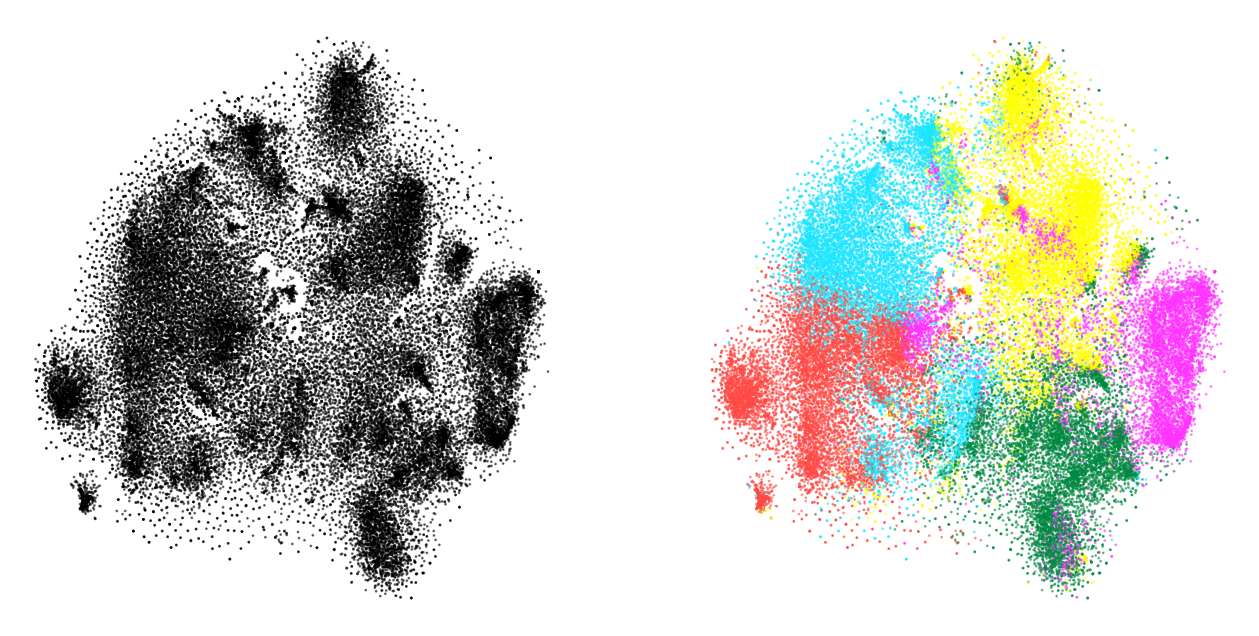

In [58]:
sample_affinities = openTSNE.affinity.PerplexityBasedNN(
    x_sample,
    perplexity=500,
    n_jobs=5,
    random_state=0,
    verbose=True,
)
sample_init = openTSNE.initialization.pca(x_sample, random_state=42)
sample_embedding = openTSNE.TSNE(n_jobs=5, verbose=True).fit(
    affinities=sample_affinities, initialization=sample_init)
plot(sample_embedding, y[indices[:50000]], alpha=0.5)

In [64]:
rest_init = sample_embedding.prepare_partial(x_rest, k=1, perplexity=1)


===> Finding 3 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 33.87 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.25 seconds


In [65]:
init_full = np.vstack((sample_embedding, rest_init))[reverse]

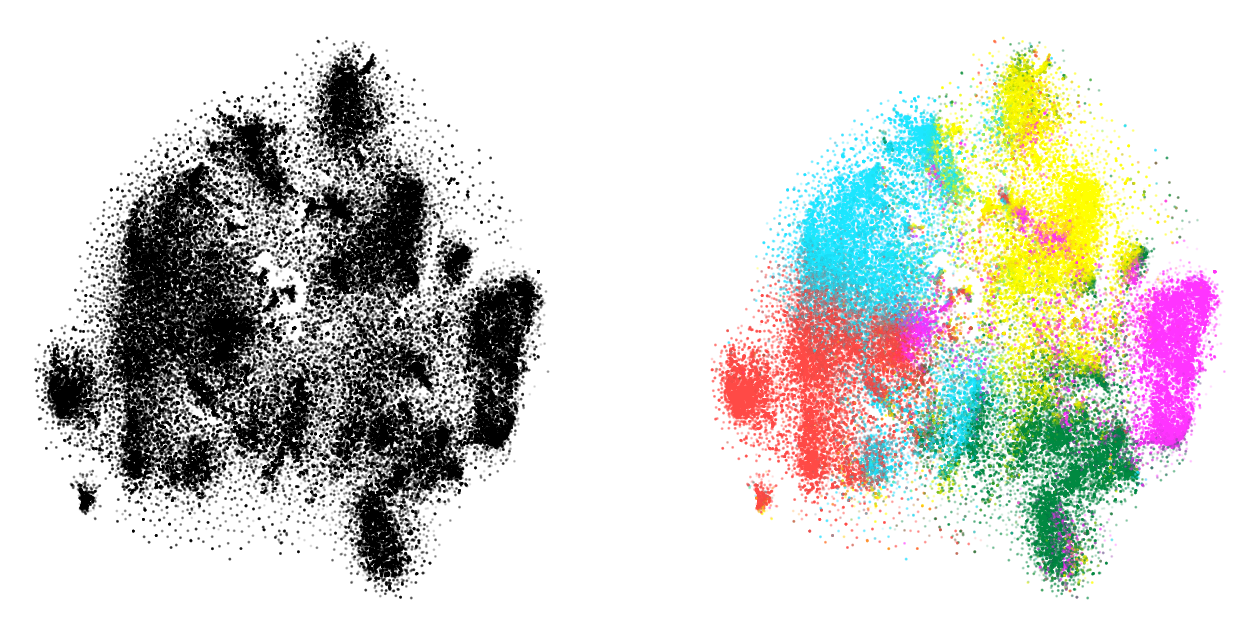

In [66]:
plot(init_full, y)

In [67]:
init_full = init_full / (np.std(init_full[:, 0]) * 10000)
np.std(init_full, axis=0)


array([1.00000000e-04, 6.17216345e-05])

In [72]:
embedding = openTSNE.TSNEEmbedding(
    init_full,
    aff50,
    n_jobs=5,
    verbose=True,
    random_state=42,
)

In [73]:
embedding1 = embedding.optimize(n_iter=500, exaggeration=12, momentum=0.5)


===> Running optimization with exaggeration=12.00, lr=43597.08 for 500 iterations...
Iteration   50, KL divergence 8.2970, 50 iterations in 23.1554 sec
Iteration  100, KL divergence 8.0429, 50 iterations in 21.8828 sec
Iteration  150, KL divergence 8.0397, 50 iterations in 21.7976 sec
Iteration  200, KL divergence 8.0396, 50 iterations in 21.9779 sec
Iteration  250, KL divergence 8.0396, 50 iterations in 22.8271 sec
Iteration  300, KL divergence 8.0396, 50 iterations in 23.8980 sec
Iteration  350, KL divergence 8.0396, 50 iterations in 22.8536 sec
Iteration  400, KL divergence 8.0396, 50 iterations in 26.3120 sec
Iteration  450, KL divergence 8.0396, 50 iterations in 26.2026 sec
Iteration  500, KL divergence 8.0396, 50 iterations in 25.1802 sec
   --> Time elapsed: 236.09 seconds


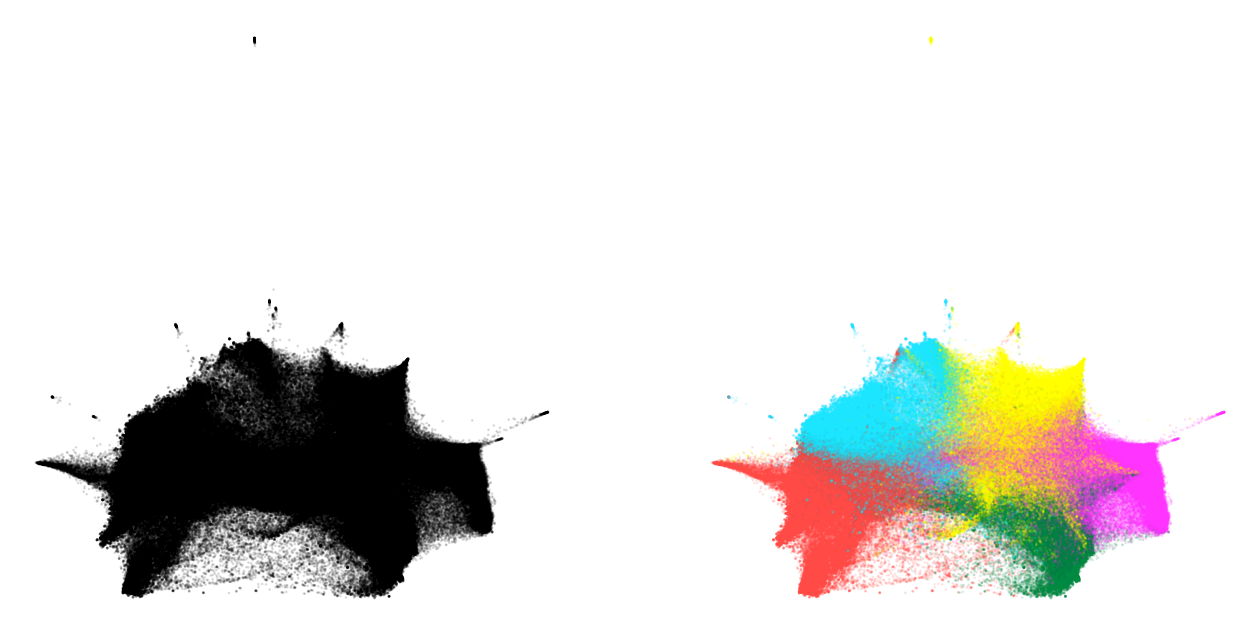

In [74]:
plot(embedding1, y)

In [75]:
embedding2 = embedding1.optimize(n_iter=250, exaggeration=4, momentum=0.8)


===> Running optimization with exaggeration=4.00, lr=43597.08 for 250 iterations...
Iteration   50, KL divergence 6.9135, 50 iterations in 25.1893 sec
Iteration  100, KL divergence 6.8457, 50 iterations in 24.6249 sec
Iteration  150, KL divergence 6.8321, 50 iterations in 23.6000 sec
Iteration  200, KL divergence 6.8294, 50 iterations in 23.5145 sec
Iteration  250, KL divergence 6.8288, 50 iterations in 24.5952 sec
   --> Time elapsed: 121.52 seconds


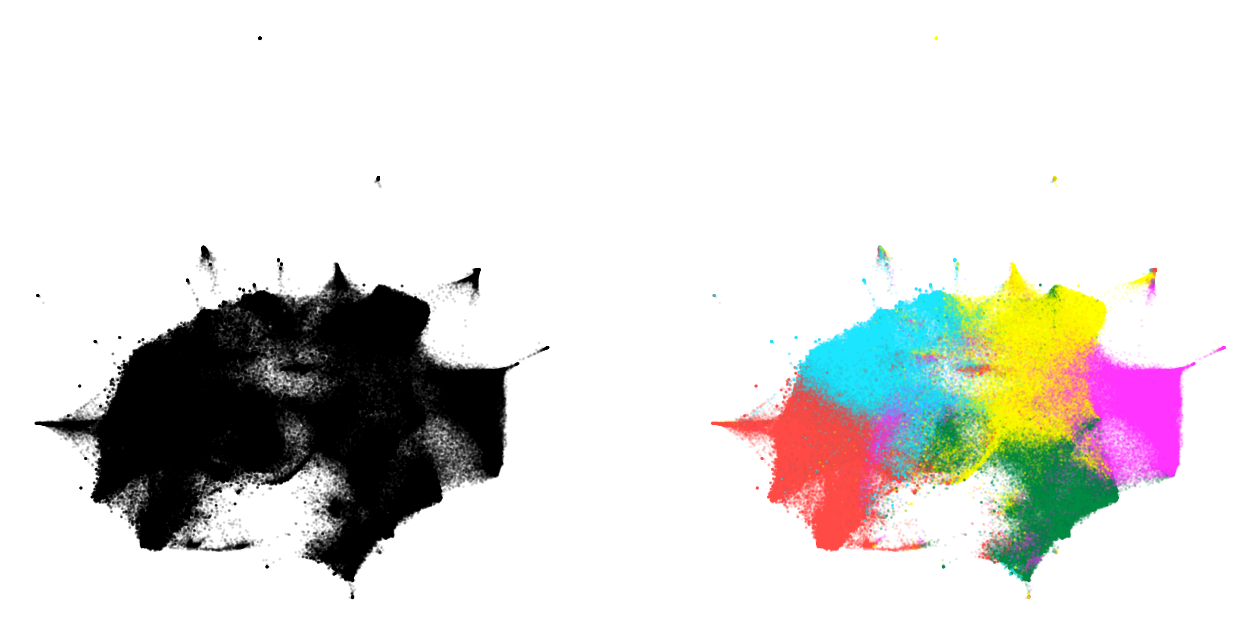

In [76]:
plot(embedding2, y)

In [77]:
embedding3 = embedding2.optimize(n_iter=250, exaggeration=4, momentum=0.8)

===> Running optimization with exaggeration=4.00, lr=43597.08 for 250 iterations...
Iteration   50, KL divergence 6.8286, 50 iterations in 26.4094 sec
Iteration  100, KL divergence 6.8285, 50 iterations in 26.6850 sec
Iteration  150, KL divergence 6.8284, 50 iterations in 26.5354 sec
Iteration  200, KL divergence 6.8284, 50 iterations in 26.6835 sec
Iteration  250, KL divergence 6.8284, 50 iterations in 26.6784 sec
   --> Time elapsed: 132.99 seconds


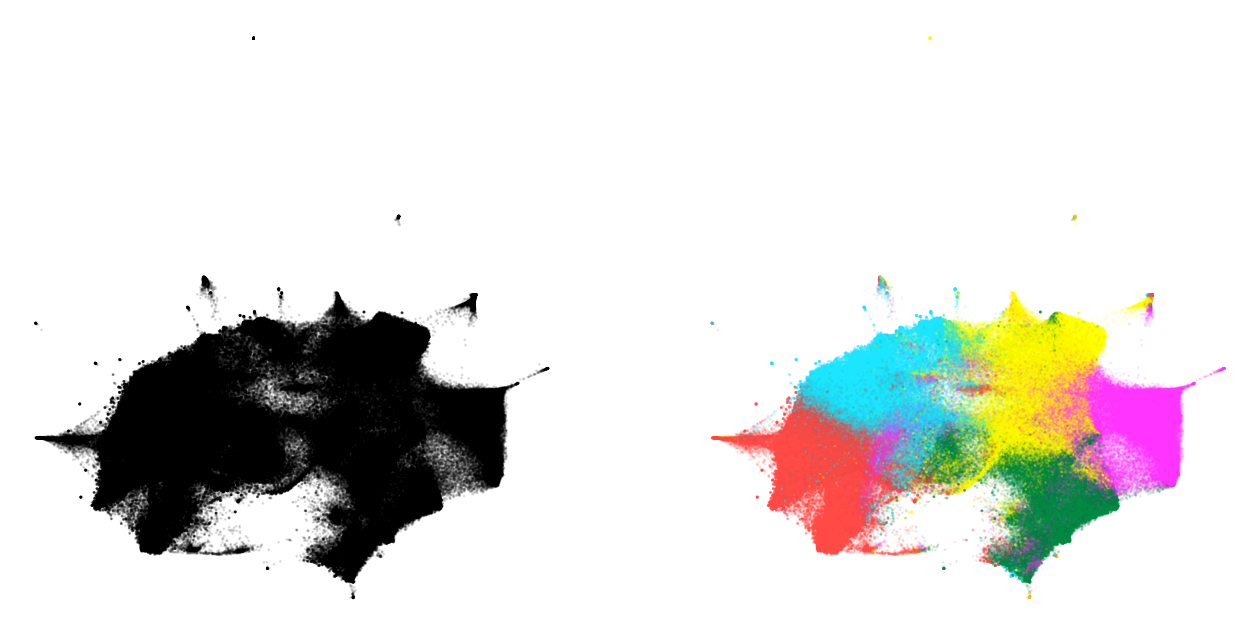

In [78]:
plot(embedding3, y)

In [79]:
embedding4 = embedding3.optimize(n_iter=250, exaggeration=4, momentum=0.8)

===> Running optimization with exaggeration=4.00, lr=43597.08 for 250 iterations...
Iteration   50, KL divergence 6.8284, 50 iterations in 24.7915 sec
Iteration  100, KL divergence 6.8284, 50 iterations in 25.5086 sec
Iteration  150, KL divergence 6.8284, 50 iterations in 26.1752 sec
Iteration  200, KL divergence 6.8283, 50 iterations in 27.9216 sec
Iteration  250, KL divergence 6.8283, 50 iterations in 26.2899 sec
   --> Time elapsed: 130.69 seconds


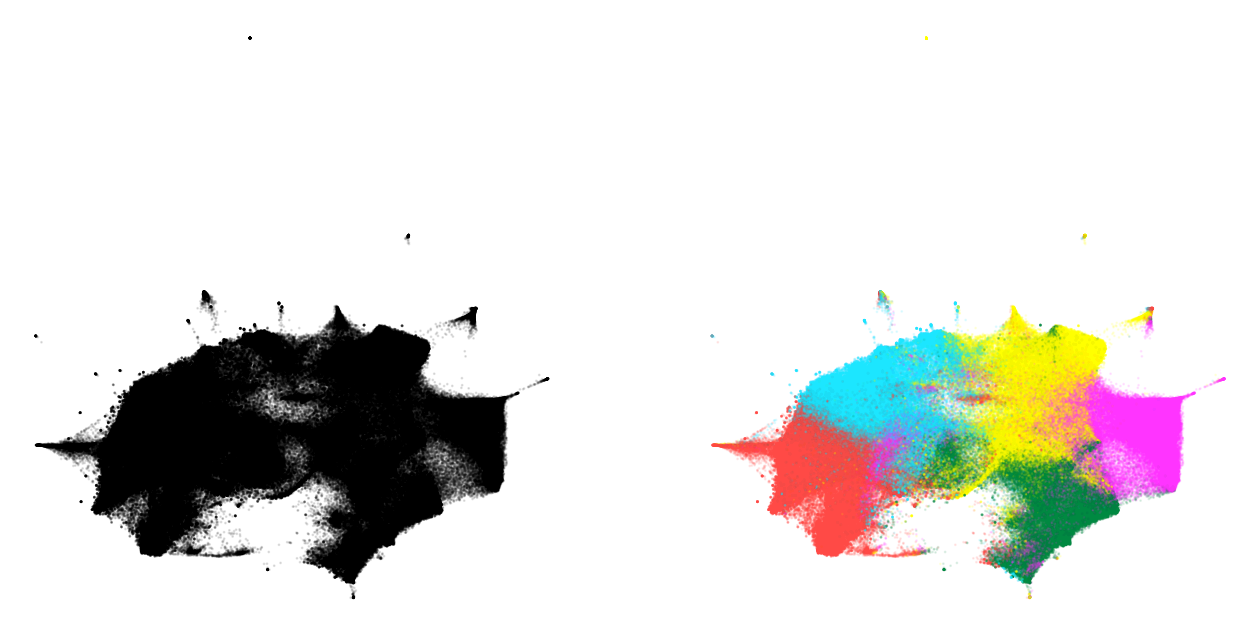

In [80]:
plot(embedding4, y)

array([2, 2, 4, ..., 2, 2, 2])